In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [4]:
df_friday_1 = pd.read_csv('/kaggle/input/ids-intrusion-csv/02-16-2018.csv')
df_friday_2 = pd.read_csv('/kaggle/input/ids-intrusion-csv/02-23-2018.csv')
df_friday_3 = pd.read_csv('/kaggle/input/ids-intrusion-csv/03-02-2018.csv')


/tmp/ipykernel_36/1034147997.py:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_friday_1 = pd.read_csv('/kaggle/input/ids-intrusion-csv/02-16-2018.csv')


In [5]:
df = pd.concat([df_friday_1, df_friday_2, df_friday_3])

In [6]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,138.592929,56300000,56300000,Benign
1,0,0,16/02/2018 08:30:12,112641773,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,263.750829,56300000,56300000,Benign
2,35605,6,16/02/2018 08:26:55,20784143,23,44,2416,1344,240,64,...,20,2624734,0.0,2624734,2624734,9058214.0,0.0,9058214,9058214,Benign
3,0,0,16/02/2018 08:33:01,112640836,3,0,0,0,0,0,...,0,0,0.0,0,0,56300000.0,82.024387,56300000,56300000,Benign
4,23,6,16/02/2018 08:27:59,20,1,1,0,0,0,0,...,20,0,0.0,0,0,0.0,0.0,0,0,Benign


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3145725 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Timestamp          object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min        

In [8]:
df.shape

(3145725, 80)

In [9]:
df.describe()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,3145725,3145725,3145725,3145725,3145725,3145725,3145725,3145725,3145725,3145725,...,3145725,3145725,3145725.0,3145725,3145725,3145725.0,3145725.0,3145725,3145725,3145725
unique,60248,7,67928,1288901,1280,1715,9113,30774,1488,265,...,16,173750,135893.0,162220,80489,260643.0,141812.0,206847,241662,8
top,80,6,16/02/2018 01:45:28,2,2,0,0,0,0,0,...,20,0,0.0,0,0,0.0,0.0,0,0,Benign
freq,753043,2612849,8403,59893,1017689,1047575,1226621,1346918,1226621,2634613,...,1567169,2950173,2999148.0,2950173,2950173,2767197.0,2976957.0,2767197,2767197,2257165


In [10]:
df['Label'].unique()

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk', 'Label',
       'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection', 'Bot'],
      dtype=object)

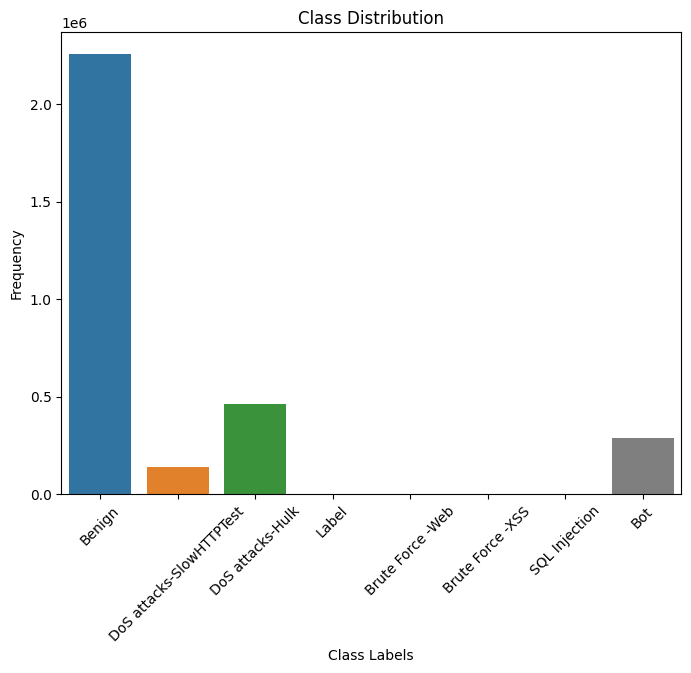

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [12]:
class_counts = df['Label'].value_counts()

benign_VS_other = ((class_counts['Benign']/class_counts).round(0).astype(int))

imbalance_ratio_df = pd.DataFrame({"count": class_counts, "benign_VS_other": benign_VS_other})
imbalance_ratio_df = imbalance_ratio_df.drop(index="Label")

print(imbalance_ratio_df)


                            count  benign_VS_other
Label                                             
Benign                    2257165                1
DoS attacks-Hulk           461912                5
Bot                        286191                8
DoS attacks-SlowHTTPTest   139890               16
Brute Force -Web              362             6235
Brute Force -XSS              151            14948
SQL Injection                  53            42588


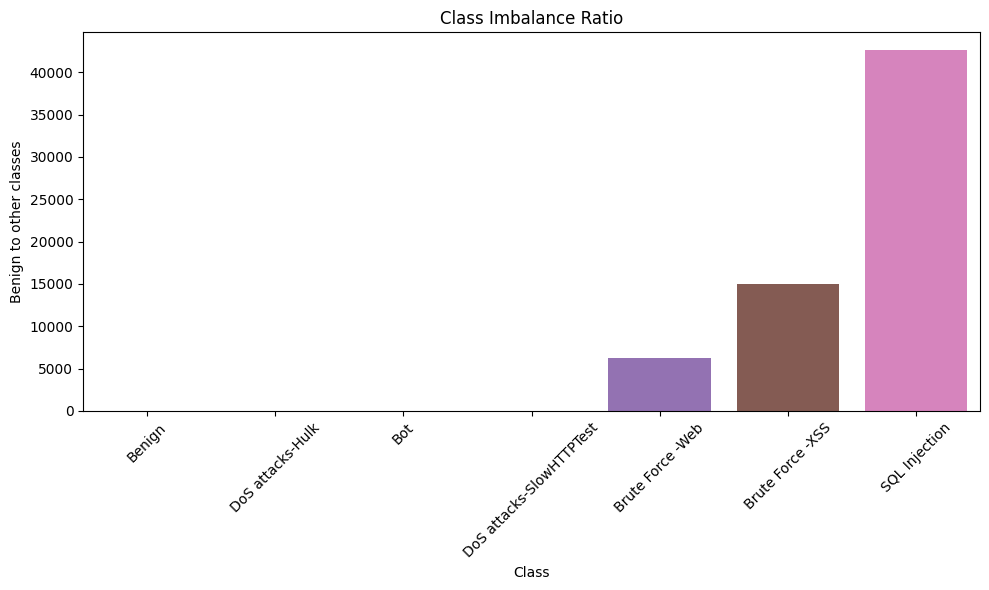

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=imbalance_ratio_df.index,y=imbalance_ratio_df['benign_VS_other'])
plt.title("Class Imbalance Ratio")
plt.xlabel("Class")
plt.ylabel("Benign to other classes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data CLeaning


Dropping null values

In [14]:
# dropping null values
num_rows_with_nan = df.isna().sum().sum() # number of rows with null values
print(num_rows_with_nan)
df.isna().sum().sort_values(ascending=False).head(10)

6312


Flow Byts/s         6312
Dst Port               0
Bwd Byts/b Avg         0
Fwd Pkts/b Avg         0
Fwd Byts/b Avg         0
Bwd Seg Size Avg       0
Fwd Seg Size Avg       0
Pkt Size Avg           0
Down/Up Ratio          0
ECE Flag Cnt           0
dtype: int64

Only Flow Byts/s column has the null values in 6312 rows, which is only 0.2% of the total number of entries. So i will drop it.

In [15]:
df = df.dropna()

In [16]:
num_rows_with_nan = df.isna().sum().sum() # number of rows with null values
print(num_rows_with_nan)

0


Drop the erronues row with "label" in the "Label" column

In [17]:
df[df["Label"] == "Label"]

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
999999,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [18]:
df = df.drop(df[df["Label"] == "Label"].index)

In [19]:
df["Label"].unique()

array(['Benign', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk',
       'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection', 'Bot'],
      dtype=object)

Drop the 'Timestamp' and 'Dst Port' columns, because of irrelevant in classifying attacks

In [20]:
df = df.drop(columns=["Timestamp", "Dst Port"])

Drop Duplicates

In [21]:
print(df.duplicated().sum().sum()) # number of duplicates

947055


In [22]:
df = df.drop_duplicates(ignore_index=True)

In [23]:
print(df.duplicated().sum().sum()) # number of duplicates

0


Infinite Values

In [24]:
inf_check = np.isinf(df.select_dtypes(include=[np.number])).any().sum()
nan_check = df.isna().sum().sum()

print("Infinite values remaining:", inf_check)
print("Total NaN cells:", nan_check)

Infinite values remaining: 0
Total NaN cells: 0


Negative Values

In [25]:
num_cols = df.select_dtypes(include=[np.number]).columns
neg_counts = (df[num_cols] < 0).sum()
neg_counts


Series([], dtype: float64)

Encode the protocol column as it is a categorical column

In [26]:
df["Protocol"].unique()

array([0, 6, 17, '6', '0', '17'], dtype=object)

In [27]:
# Convert everything to string and strip whitespace
df["Protocol"] = df["Protocol"].astype(str).str.strip()
# Convert to integer
df["Protocol"] = df["Protocol"].astype(int)

In [28]:
# Convert to categorical, then dummies
df["Protocol"] = df["Protocol"].astype("category")
df = pd.get_dummies(df, columns=["Protocol"], drop_first=True, dtype=int)

In [29]:
df.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Protocol_6,Protocol_17
0,112640768,3,0,0,0,0,0,0.0,0.0,0,...,0.0,0,0,56300000.0,138.592929,56300000,56300000,Benign,0,0
1,112641773,3,0,0,0,0,0,0.0,0.0,0,...,0.0,0,0,56300000.0,263.750829,56300000,56300000,Benign,0,0
2,20784143,23,44,2416,1344,240,64,105.043478,54.542292,64,...,0.0,2624734,2624734,9058214.0,0.0,9058214,9058214,Benign,1,0
3,112640836,3,0,0,0,0,0,0.0,0.0,0,...,0.0,0,0,56300000.0,82.024387,56300000,56300000,Benign,0,0
4,20,1,1,0,0,0,0,0.0,0.0,0,...,0.0,0,0,0.0,0.0,0,0,Benign,1,0


convert object dtypes to float

In [30]:
print("Object columns:", df.select_dtypes(include=["object"]).columns.tolist())

Object columns: ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/

In [31]:
obj_cols = df.select_dtypes(include=["object"]).columns.drop("Label", errors="ignore")
df[obj_cols] = df[obj_cols].apply(pd.to_numeric, errors="coerce").astype(float)

In [32]:
df.dtypes.value_counts()
# no object dtypes now, only label column

float64    76
int64       2
object      1
Name: count, dtype: int64

In [33]:
df.select_dtypes(include=["object"])

,Label
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign
...,...
2192350,Benign
2192351,Benign
2192352,Benign
2192353,Benign


In [35]:
df.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
   

Rearranging the columns

In [36]:
columns = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min', 'Protocol_6', 'Protocol_17', 'Label']
df = df[columns]
df.columns

Index(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
   

In [37]:
df.to_csv("cleaned.csv", index=False)